
# House Price Prediction

# 1. 数据探索
## 1.1 文件
1. train.csv 训练集
2. test.csv 测试集
3. data_description.txt 每个column的细致描述
4. sample_submission.csv 提交样例，对每个房屋id，给出预测的salePrice

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1.2 简单探索
对数据的分布，缺失值等基本数据进行探究

In [39]:
sample_submission = pd.read_csv('sample_submission.csv')
#sample_submission.head()

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


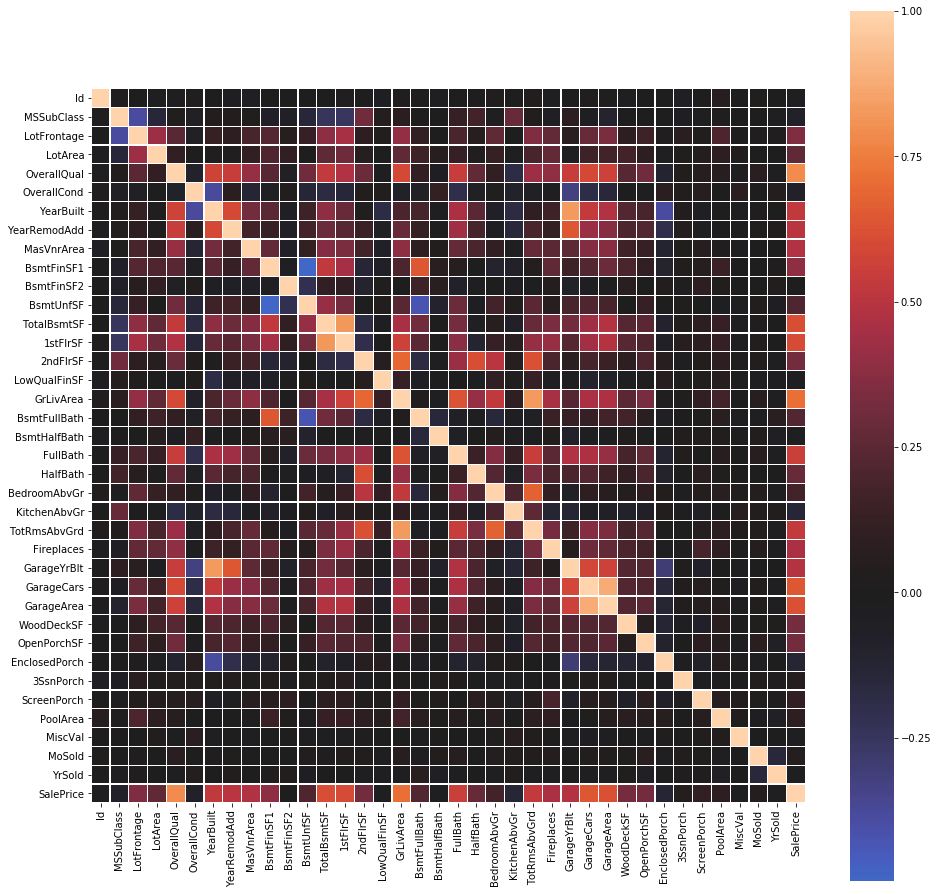

In [38]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(), center=0,square=True,linewidths=.2)

可以发现，又很多属性和SalePrice相关性极小，我们将相关性较大的几个属性作为特征。
- LotFrontage
- LotArea
- OverallQual
- YearBuilt
- YearRemoodAdd
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- TotalBsmtSF
- lstFlrSF
- 2nd
.....

## 1.3 房价
首先查看一下预测target房价的分布

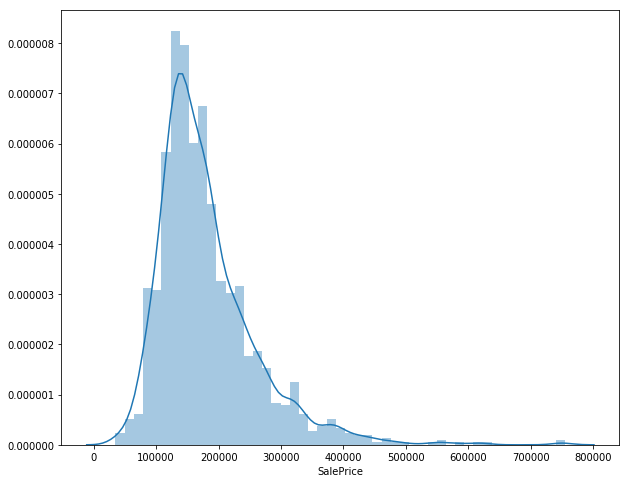

In [9]:
plt.figure(figsize=(10,8))
sns.distplot(train.SalePrice)

左边是原始的SalePrice的分布，可以看出来数据的分布是明显左偏的，将它取对数之后，如右图所示，就比较接近正态分布，而且LB上的分数也是取对数计算的，所以之后使用取对数后的值作为目标值。

## 1.4 属性分析
### 1.4.1 CentralAir 中央空调

In [44]:
train.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

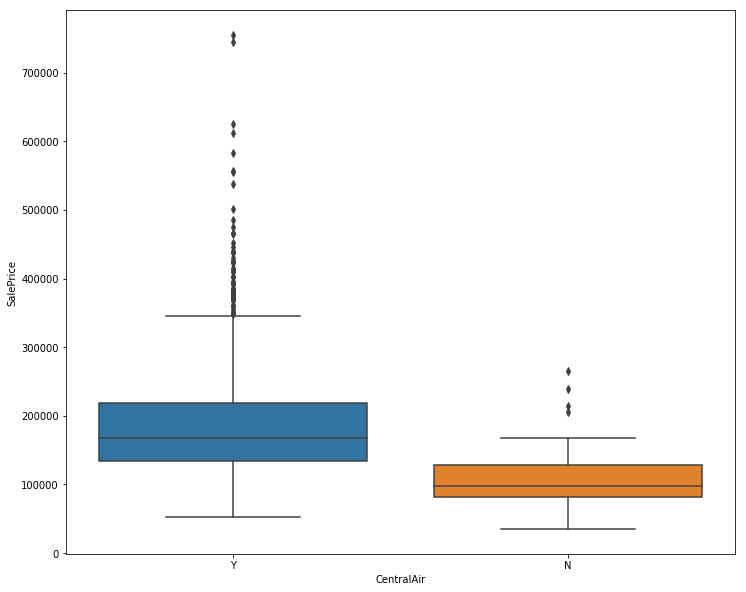

In [48]:
plt.figure(figsize=(12, 10))
sns.boxplot(train.CentralAir, train.SalePrice)

可以明显发现，有中央空调的房屋价格更高
### 1.4.2 属性：LotArea
属性：类似于一种面积

In [13]:
train.LotArea.dtype

dtype('int64')

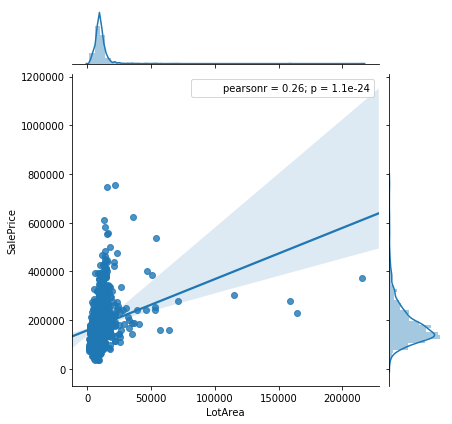

In [16]:
sns.jointplot(train.LotArea, train.SalePrice, kind='reg')

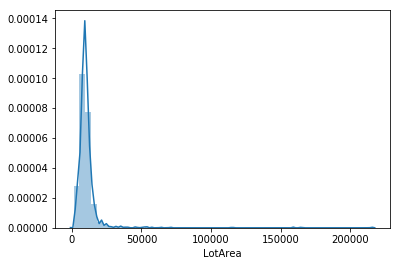

In [17]:
sns.distplot(train.LotArea)

初步观察，属性LotArea和房价没有特殊的线性关系，而且该房价也主要集中在0附近，不予保留。

### 1.4.3 Neighborhood

In [18]:
train.Neighborhood.dtype

dtype('O')

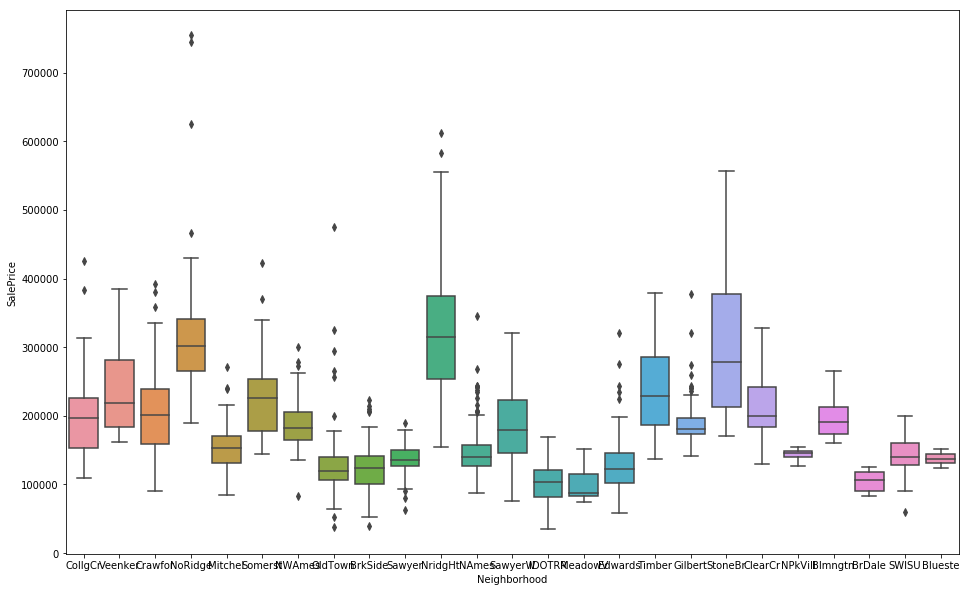

In [50]:
plt.figure(figsize=(16,10))
sns.boxplot(train.Neighborhood, train.SalePrice)

通过观察我们可以发现，不同的neighborhood对房价有不同的影响。
### 1.4.4 OverallQual总体评价

In [51]:
train.OverallQual.dtype

dtype('int64')

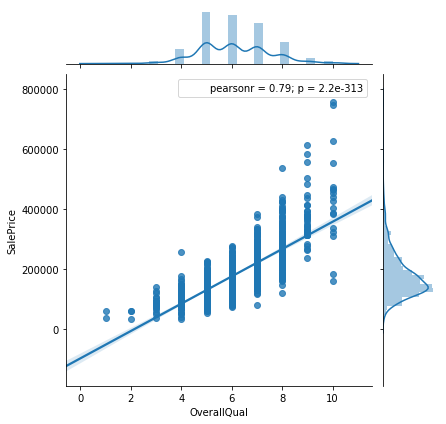

In [55]:
sns.jointplot(train.OverallQual,train.SalePrice, kind='reg')

OverallQual和房价呈正相关关系。
### 1.4.5 YearBuilt 建造年份

In [56]:
train.YearBuilt.dtype

dtype('int64')

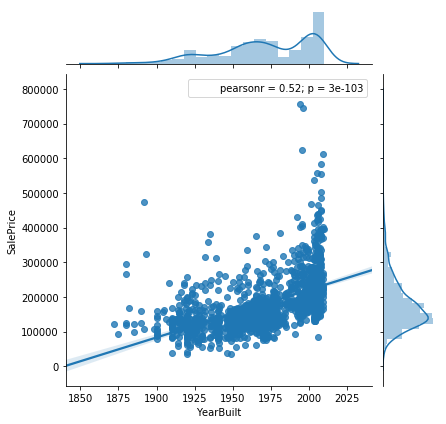

In [57]:
sns.jointplot(train.YearBuilt, train.SalePrice, kind='reg')

建造年份和房价呈现正相关

### 1.4.6 GrLivArea

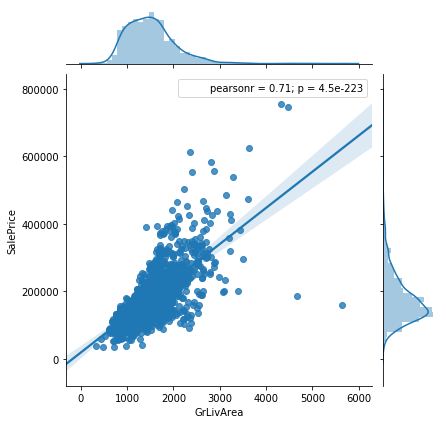

In [58]:
sns.jointplot(train.GrLivArea, train.SalePrice,kind='reg')

生活面积与房价有较大相关性。
### 1.4.7 TotalBsmtSF

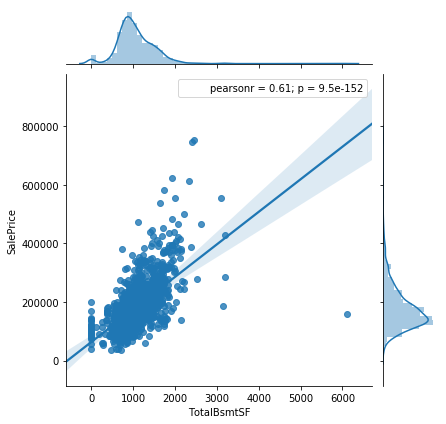

In [59]:
sns.jointplot(train.TotalBsmtSF, train.SalePrice, kind='reg')

该属性的意义是地下室面积，和房价呈现正相关

### 1.4.8 MiscVal

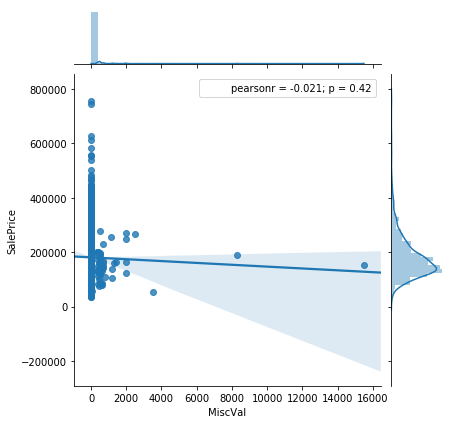

In [60]:
sns.jointplot(train.MiscVal, train.SalePrice, kind='reg')

如图，附加值对房价没有什么大的影响，顾不予考虑

### 1.4.9 GarageArea/GarageCars

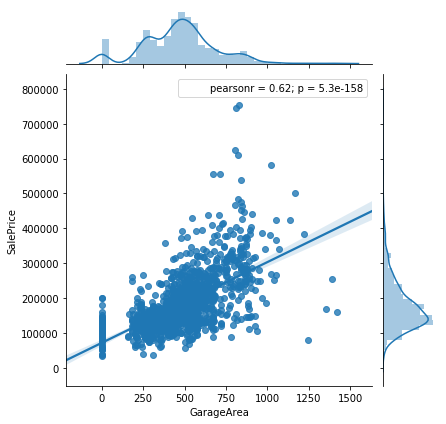

In [61]:
sns.jointplot(train.GarageArea, train.SalePrice, kind='reg')

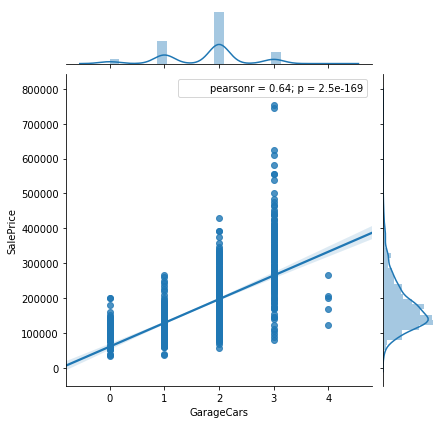

In [62]:
sns.jointplot(train.GarageCars, train.SalePrice, kind='reg')

由上图可知，房价和车库面积以及容纳车辆数呈现线性关系，所以保留。
## 1.5 主要属性
经过上述的数据探索，我们选出一下主要属性：
- GrLivArea
- TotalBsmtSF
- GarageArea
- GarageCars
- YearBuilt
- CentralAir
- OverallQual
- Neighborhood